In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
state_data = pd.read_csv('https://api.covid19india.org/csv/latest/statewise_tested_numbers_data.csv')

In [107]:
df_states = state_data[['Updated On', 'State', 'Total Tested', 'Positive']]

In [113]:
df_states['Date'] = pd.to_datetime(df_states['Updated On'], format='%d/%m/%Y')
df_states.Date.value_counts()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


2020-05-04    31
2020-05-01    31
2020-04-21    30
2020-05-05    30
2020-04-29    30
2020-05-03    30
2020-04-19    29
2020-04-28    29
2020-04-30    29
2020-04-27    29
2020-05-02    29
2020-04-24    28
2020-04-18    28
2020-04-20    28
2020-04-22    28
2020-04-17    27
2020-04-16    27
2020-04-14    27
2020-04-15    27
2020-04-26    26
2020-04-23    26
2020-04-11    25
2020-04-12    25
2020-04-25    25
2020-04-13    25
2020-04-10    24
2020-05-06    19
2020-04-09    19
2020-04-07    12
2020-04-08    12
2020-05-07     9
2020-04-05     9
2020-04-02     8
2020-04-03     5
2020-04-06     5
2020-04-01     3
2020-04-04     1
2020-02-16     1
2050-05-02     1
2020-02-04     1
Name: Date, dtype: int64

In [93]:
df_states.drop('Updated On', axis=1, inplace=True)
df_states.head()

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,State,Total Tested,Positive,Date
0,Andaman and Nicobar Islands,1403.0,12.0,2020-04-17
1,Andaman and Nicobar Islands,2679.0,27.0,2020-04-24
2,Andaman and Nicobar Islands,2848.0,33.0,2020-04-27
3,Andaman and Nicobar Islands,3754.0,33.0,2020-05-01
4,Andhra Pradesh,1800.0,132.0,2020-04-02


In [116]:
df_total = df_states.groupby('Date')['Total Tested', 'Positive'].apply(sum)
df_total.reset_index(inplace=True)
df_total.tail()

,Date,Total Tested,Positive
35,2020-05-04,1248249.0,43675.0
36,2020-05-05,1313364.0,48019.0
37,2020-05-06,219215.0,2490.0
38,2020-05-07,0.0,0.0
39,2050-05-02,4955.0,5.0


In [129]:
df_total['Positive Rate'] = 100 * df_total['Positive'] / df_total['Total Tested']
df_total['State'] = 'Total'
df_total.head()

,Date,Total Tested,Positive,Positive Rate,State
0,2020-02-04,9744.0,306.0,3.140394,Total
1,2020-02-16,552.0,7.0,1.268116,Total
2,2020-04-01,11245.0,302.0,2.685638,Total
3,2020-04-02,14906.0,510.0,3.421441,Total
4,2020-04-03,20130.0,898.0,4.461003,Total


In [119]:
df_total.set_index('Date', inplace=True)

In [130]:
df_total.tail (30)

,Date,Total Tested,Positive,Positive Rate,State
10,2020-04-09,122239.0,4939.0,4.040445,Total
11,2020-04-10,155566.0,6490.0,4.171863,Total
12,2020-04-11,171360.0,7830.0,4.569328,Total
13,2020-04-12,191530.0,8380.0,4.375294,Total
14,2020-04-13,210051.0,9389.0,4.469867,Total
15,2020-04-14,234812.0,10406.0,4.431630,Total
16,2020-04-15,260776.0,11409.0,4.375019,Total
17,2020-04-16,298791.0,12341.0,4.130312,Total
18,2020-04-17,333144.0,13435.0,4.032791,Total
19,2020-04-18,363532.0,14481.0,3.983418,Total


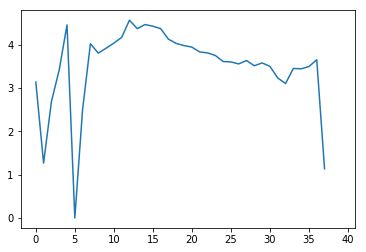

In [133]:
plt.plot(df_total['Positive Rate'])

In [134]:
df_total.tail()

,Date,Total Tested,Positive,Positive Rate,State
35,2020-05-04,1248249.0,43675.0,3.498901,Total
36,2020-05-05,1313364.0,48019.0,3.656184,Total
37,2020-05-06,219215.0,2490.0,1.135871,Total
38,2020-05-07,0.0,0.0,NaN,Total
39,2050-05-02,4955.0,5.0,0.100908,Total


In [136]:
df_total.sort_values(by='Date')

,Date,Total Tested,Positive,Positive Rate,State
0,2020-02-04,9744.0,306.0,3.140394,Total
1,2020-02-16,552.0,7.0,1.268116,Total
2,2020-04-01,11245.0,302.0,2.685638,Total
3,2020-04-02,14906.0,510.0,3.421441,Total
4,2020-04-03,20130.0,898.0,4.461003,Total
5,2020-04-04,1042.0,0.0,0.000000,Total
6,2020-04-05,59455.0,1493.0,2.511143,Total
7,2020-04-06,29698.0,1196.0,4.027207,Total
8,2020-04-07,79123.0,3014.0,3.809259,Total
9,2020-04-08,63058.0,2473.0,3.921786,Total


In [149]:
df_total = df_total[~df_total.Date.isin(['2020-02-04', '2020-02-16', '2020-05-07',\
                                         '2050-05-02', '2020-05-06', '2020-04-04'])]
df_total.shape

(33, 5)

In [161]:
import numpy as np

In [172]:
trend = np.poly1d(np.polyfit(np.array(df_total.index), np.array(df_total['Positive Rate']), 3))((df_total.index))

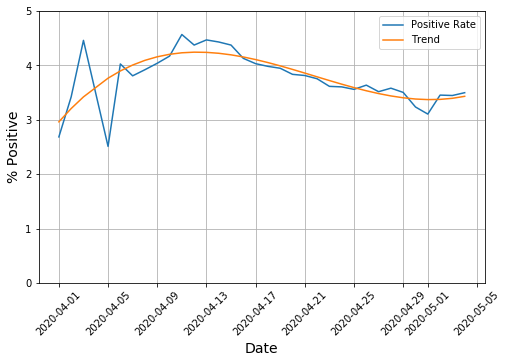

In [174]:
plt.figure(figsize=(8, 5))
plt.ylim(0, 5)
plt.xlabel('Date', fontsize=14)
plt.ylabel('% Positive', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.plot(df_total['Date'], df_total['Positive Rate'])
plt.plot(df_total['Date'], trend, label = 'Trend')
plt.legend()


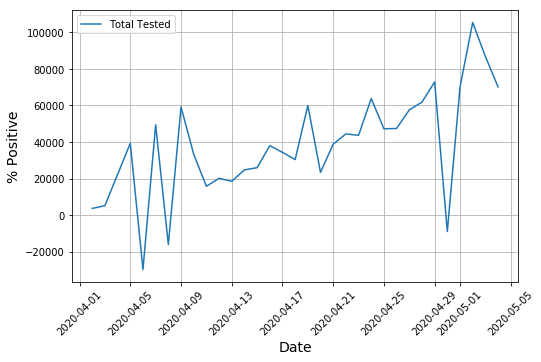

In [190]:
plt.figure(figsize=(8, 5))
plt.xlabel('Date', fontsize=14)
plt.ylabel('% Positive', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.plot(df_total['Date'], df_total['Total Tested'].diff())

plt.legend()
